# Contents
1. <a href="#Spatial-Resolution:-Sub-and-Over-Sampling">Spatial Resolution</a>
2. <a href="#Log-Intensity-Transformation">Log-Intensity Transformation</a>
3. <a href="#Power-Law-(Gamma)-Transformation">Power Law (Gamma) Transformation</a>
4. <a href="#Contrast-Stretching">Contrast Stretching</a>
5. <a href="#Bit-Plane-Slicing-and-Intensity-Level-Slicing">Bit-Plane Slicing and Intensity-Level Slicing</a>
6. <a href="#Image-Histogram-Equalization-(Both-Multi-and-Single-Channel-Images)">Image Histogram Equalization</a>

An effort to make sharpen images 👇

{

7. <a href="#Laplacian-and-Enhanced-Laplacian-Filters">Laplacian and Enhanced-Laplacian Filters</a>
8. <a href="#1st-and-2nd-Derivative">1<sup>st</sup> and 2<sup>nd</sup> order Derivatives</a>

}

9. <a href="#Edge-Detection">Edge Detection</a>

# Spatial Resolution: Sub and Over-Sampling

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

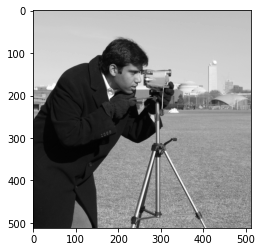

In [22]:
img=data.camera()
h,w=img.shape
plt.imshow(img, 'gray')
Image.fromarray(img).save('camera('+str(h)+'x'+str(w)+').jpg')
# Image saved to storage

# Sub-Sampling
Means resizing to smaller size image

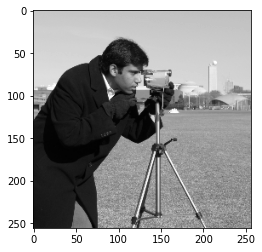

In [50]:
height, width=img.shape
th=2
height=int(height/th)
width=int(width/th)
imgNew=np.ndarray((height, width), dtype=np.uint8)
for i in range(0,height):
    for j in range(0,width):
        imgNew[i][j]=img[i*th][j*th]
plt.imshow(imgNew, 'gray')
Image.fromarray(imgNew).save('camera_sub-sampled('+str(width)+'x'+str(height)+').jpg')
# Image saved to storage

# Over-Sampling:
Resizing image to larger size

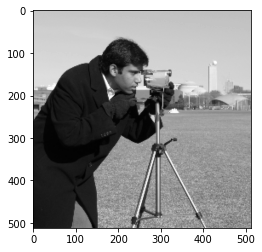

In [51]:
h,w=imgNew.shape
old_h=h
old_w=w
th=2
h=h*th
w=w*th
imgNew2=np.ndarray((h,w),dtype=np.uint8)
for i in range(0,h):
    for j in range(0,w):
        imgNew2[i][j]=imgNew[int(i/th)][int(j/th)]
plt.imshow(imgNew2, 'gray')
imfile=Image.fromarray(imgNew2)
imfile.save('camera_over-sampled from ('+str(old_w)+'x'+str(old_h)+') to ('+str(h)+'x'+str(w)+').jpg')
# Image saved to storage

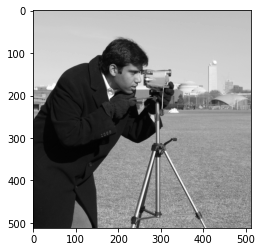

In [25]:
img=data.camera()
plt.imshow(img, 'gray')

## Log Intensity Transformation

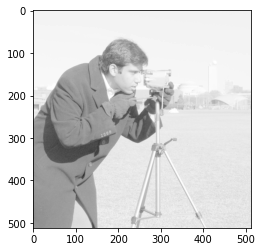

In [26]:
c = 255/(np.log(1 + np.max(img)))
img=data.camera()
height, width=img.shape
for i in range(0,height):
    for j in range(0,width):
        img[i][j]=c*np.log(1+img[i][j])
plt.imshow(img, 'gray')
Image.fromarray(img).save('LogTransformed.jpg')
# Image saved to storage

## Power-Law (Gamma) Transformation
Source: https://www.geeksforgeeks.org/python-intensity-transformation-operations-on-images/

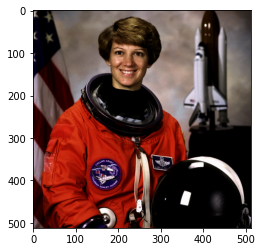

In [27]:
gamma=2.5
img=data.astronaut()
img=np.array(255*(img/255)**gamma, dtype='uint8')
plt.imshow(img)
Image.fromarray(data.astronaut()).save('GammaCorrected_Before.jpg')
# Image saved to storage
Image.fromarray(img).save('GammaCorrected_After.jpg')
# Image saved to storage

# Contrast Stretching

In [28]:
def contrast_stretch(r1,s1,r2,s2, px):
    if px>=0 and px<r1:
        return (s1/r1)*px
    elif px>=r1 and px<r2:
        return ((s2-s1)/(r2-r1)*px-r1)+s1
    else:
        return ((255-s2)/(255-r2))*(px-r2)+s2

In [29]:
img=data.camera()
original=img.copy()

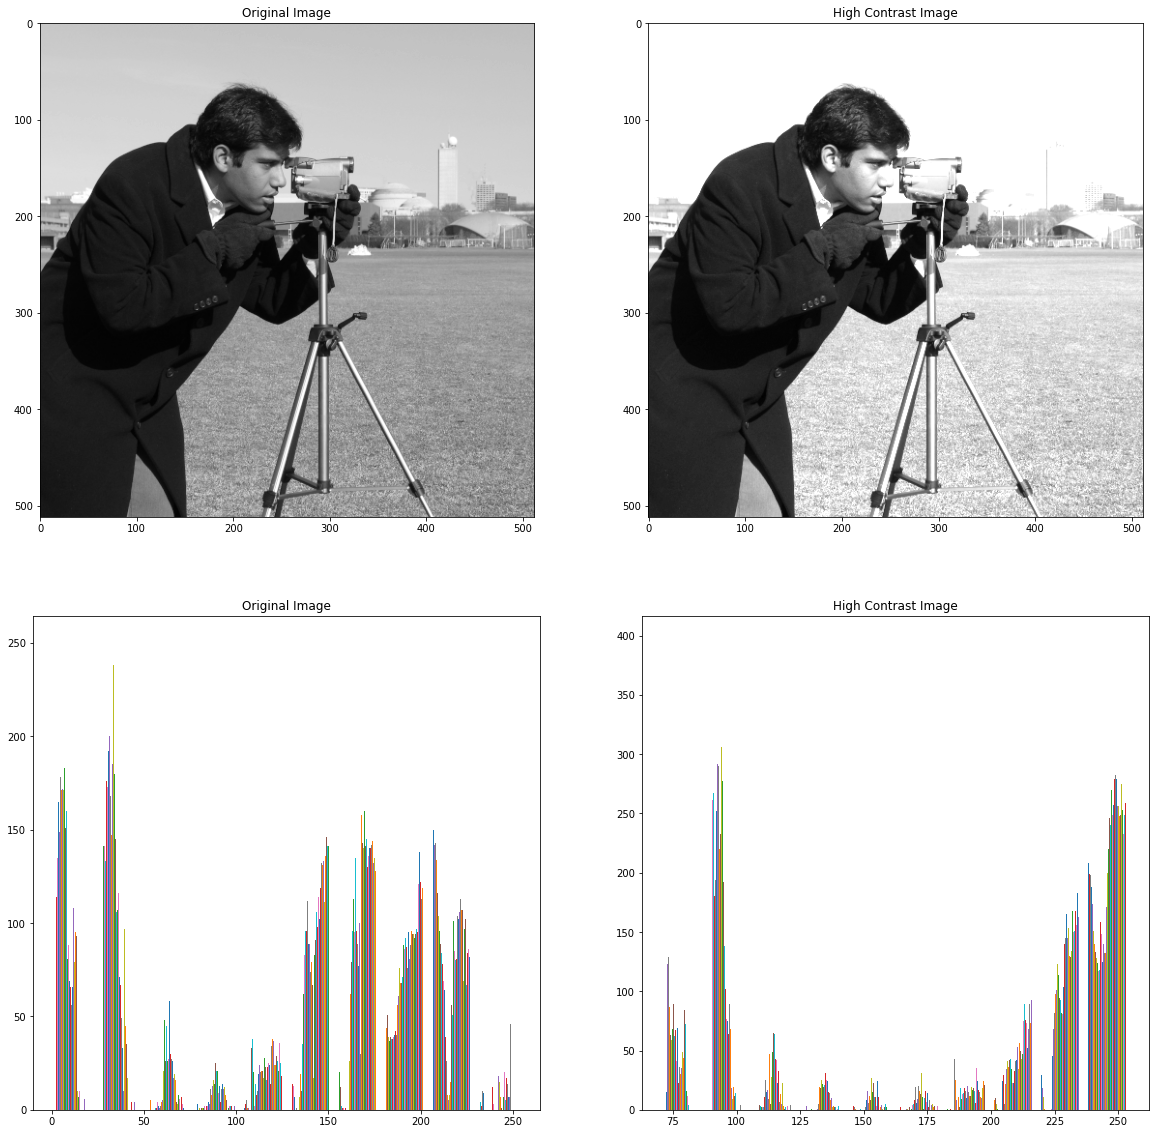

In [30]:
r1,s1=(0,70)
r2,s2=(180,255)
contrast_vc=np.vectorize(contrast_stretch)
img=contrast_vc(r1,s1,r2,s2,img)
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(original, 'gray')

plt.subplot(2,2,2)
plt.title('High Contrast Image')
plt.imshow(img, 'gray') # Repeated executions of this cell will intensify the contrast. 
# Run 1 above cell if 'High Contrast Image' is blank

plt.subplot(2,2,3)
plt.title('Original Image')
plt.hist(original);

plt.subplot(2,2,4)
plt.title('High Contrast Image')
plt.hist(img);

# Bit-Plane Slicing and Intensity-Level Slicing
Both are almost same thing. Bit-Plane concerns pixels with intensity within with 2^exp and Intensity-Level concerns with other intensity values of each pixel

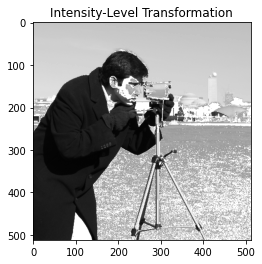

In [31]:
img=data.camera()
h,w=img.shape
for i in range(0,h):
    for j in range(0,w):
        if img[i][j]>=100 and img[i][j]<150:
            img[i][j]=255
plt.title("Intensity-Level Transformation")
plt.imshow(img, 'gray')

Bit-Planes of 8-bit Image -> (0-2<sup>1</sup>), (2<sup>1</sup>-2<sup>2</sup>), (2<sup>2</sup>-2<sup>3</sup>), (2<sup>3</sup>-2<sup>4</sup>), (2<sup>4</sup>-2<sup>5</sup>), (2<sup>5</sup>-2<sup>6</sup>), (2<sup>6</sup>-2<sup>7</sup>), (2<sup>7</sup>-2<sup>8</sup>)

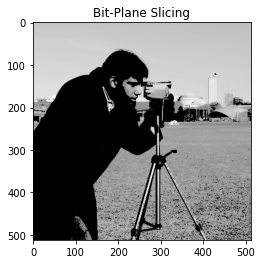

In [32]:
img=data.camera()
h,w=img.shape
for i in range(0,h):
    for j in range(0,w):
        if img[i][j]>=128 and img[i][j]<255:
            pass
        else:
            img[i][j]=0
plt.title('Bit-Plane Slicing')
plt.imshow(img, 'gray')

# Image Histogram Equalization (Both Multi and Single Channel Images)
Sources:<br>
https://ukdevguy.com/histogram-equalization-in-python/ <br>
https://www.youtube.com/watch?v=cVg2WiAX8Lg <br>
Python `lambda`: https://www.w3schools.com/python/python_lambda.asp <br>
Python `map()`: https://www.geeksforgeeks.org/python-map-function/ <br>
`lambda` and `map()` are also explained in next cells

In [33]:
def make_histogram(img):
    """ Take an image and create a historgram from it's luma values """
    if len(img.shape)==3:
        y_vals = img[:,:,0].flatten()
    else:
        y_vals = img.flatten()
    histogram = np.zeros(256, dtype=int)
    for y_index in range(y_vals.size):
        histogram[y_vals[y_index]] += 1
    return histogram

def make_cumsum(histogram):
    """ Create an array that represents the cumulative sum of the histogram """
    cumsum = np.zeros(256, dtype=int)
    cumsum[0] = histogram[0]
    for i in range(1, histogram.size):
        cumsum[i] = cumsum[i-1] + histogram[i]
    return cumsum

def make_mapping(histogram, cumsum, img):
    """ Create a mapping s.t. each old luma value is mapped to a new
        one between 0 and 255. Mapping is created using:
         - M(i) = max(0, round((luma_levels*cumsum(i))/(h*w))-1)
        where luma_levels is the number of luma levels in the image """
    mapping = np.zeros(256, dtype=int)
    luma_levels = 256
    shape=img.shape
    if len(shape)==3:
        IMG_H, IMG_W=(shape[0], shape[1])
    else:
        IMG_H, IMG_W=img.shape
    for i in range(histogram.size):
        mapping[i] = max(0, round((luma_levels*cumsum[i])/(IMG_H*IMG_W))-1)
    return mapping

def apply_mapping(img, mapping):
    """ Apply the mapping to our image """
    new_image = img.copy()
    new_image = np.array(list(map(lambda a : mapping[a], img)), dtype=np.uint8) # Below for details of what happened
        # 'img' value passed to lambda function as 'a', lambda function passed 'a' to mapping[a] and returned it's output.
        # Also, I converted incoming list() to np.array to silence out an error about '__array_interface__'
    return new_image

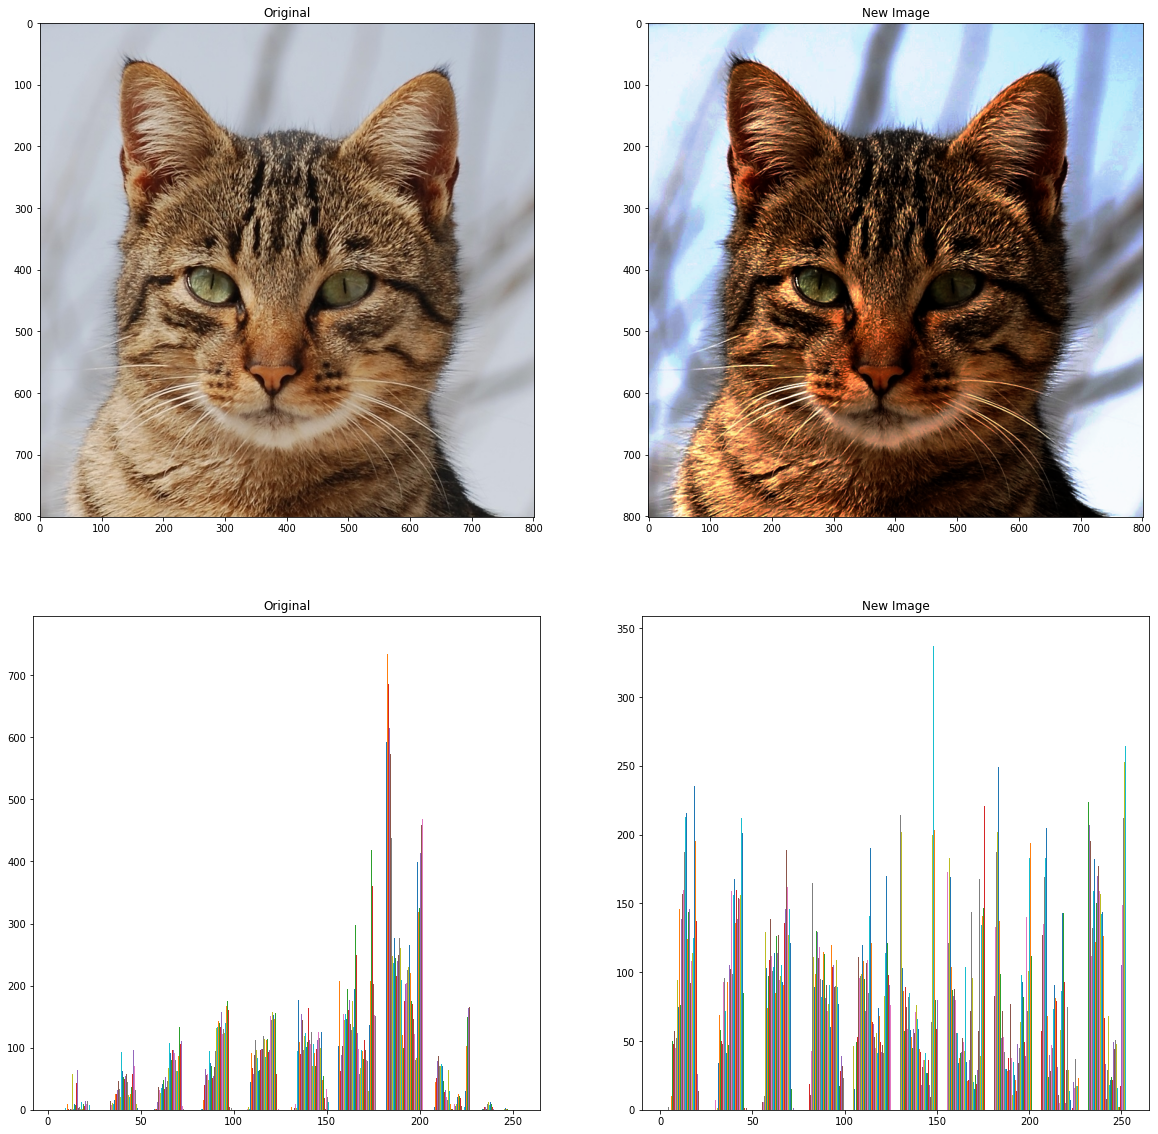

In [34]:
img=Image.open('catpic4.jpg')
img=np.array(img)

# Below statement acts as grey/color image output switch. For color output, comment below line. 
# If inputting grey-scale image, comment below line.
# img=img[:,:,0]

hist=make_histogram(img)
cumsum=make_cumsum(hist)
mapping=make_mapping(hist, cumsum, img)
newImg=apply_mapping(img, mapping)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(img, 'gray')

plt.subplot(2,2,2)
plt.title('New Image')
plt.imshow(newImg, 'gray')
Image.fromarray(newImg).save('HistogramEqualized.jpg')
# Image saved to storage

plt.subplot(2,2,3)
plt.title('Original')
if len(img.shape)==3:
    plt.hist(img[:,:,0]);
else:
    plt.hist(img);

plt.subplot(2,2,4)
plt.title('New Image')
if len(img.shape)==3:
    plt.hist(newImg[:,:,0]);
else:
    plt.hist(newImg);

## Talking about the `map()` and `lambda` used in above cells...
Compare below two cells. They're doing same thing... They're simplified form of `apply_mapping()`

<class 'list'>


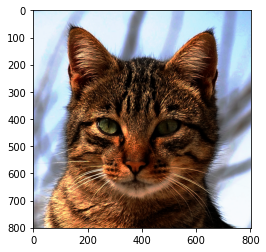

In [35]:
# img=data.camera()

new_img=list(map(lambda a:mapping[a], img))
print(type(new_img))
plt.imshow(new_img, 'gray');

<class 'list'>


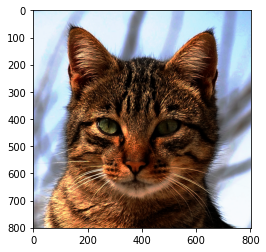

In [36]:
def foo(img):
    out=list()
    inn=list()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            inn.append(mapping[img[i,j]])
        out.append(inn)
        inn=[]
    return out
new_img=foo(img)
print(type(new_img))
plt.imshow(new_img, 'gray');

## Laplacian and Enhanced-Laplacian Filters

And something happened... I don't know what I did and didn't... Just an effort to increase sharpness of the images...!

Source of understanding: https://youtu.be/Yi161n-Bquo

In [37]:
def laplacian_filter(img:np.array):
    mask_size=3
    mask=[
        [0,1, 0],
        [1,-4,1],
        [0,1,0]
         ]
    shape=img.shape
    IMG_H, IMG_W=shape[0], shape[1]
    edge_pad=mask_size-mask_size//2-1
    img1=np.zeros((IMG_H, IMG_W))
    for i in range(edge_pad, IMG_H-edge_pad):
        for j in range(edge_pad, IMG_W-edge_pad):
            img1[i,j]=img[i-1, j-1]*mask[0][0]+img[i-1, j]*mask[0][1]+img[i-1, j+1]*mask[0][2]+img[i, j-1]*mask[1][0]+img[i, j]*mask[1][1]+img[i, j+1]*mask[1][2]+img[i+1, j-1]*mask[2][0]+img[i+1, j]*mask[2][1]+img[i+1, j+1]*mask[2][2]
    return img1

def enhanced_laplacian_filter(img:np.array):
    mask_size=3
    mask=[
        [0,-1, 0],
        [-1,5,-1],
        [0,-1,0]
         ]
    shape=img.shape
    IMG_H, IMG_W=shape[0], shape[1]
    edge_pad=mask_size-mask_size//2-1
    img1=np.zeros((IMG_H, IMG_W))
    for i in range(edge_pad, IMG_H-edge_pad):
        for j in range(edge_pad, IMG_W-edge_pad):
            img1[i,j]=img[i-1, j-1]*mask[0][0]+img[i-1, j]*mask[0][1]+img[i-1, j+1]*mask[0][2]+img[i, j-1]*mask[1][0]+img[i, j]*mask[1][1]+img[i, j+1]*mask[1][2]+img[i+1, j-1]*mask[2][0]+img[i+1, j]*mask[2][1]+img[i+1, j+1]*mask[2][2]
    return img1

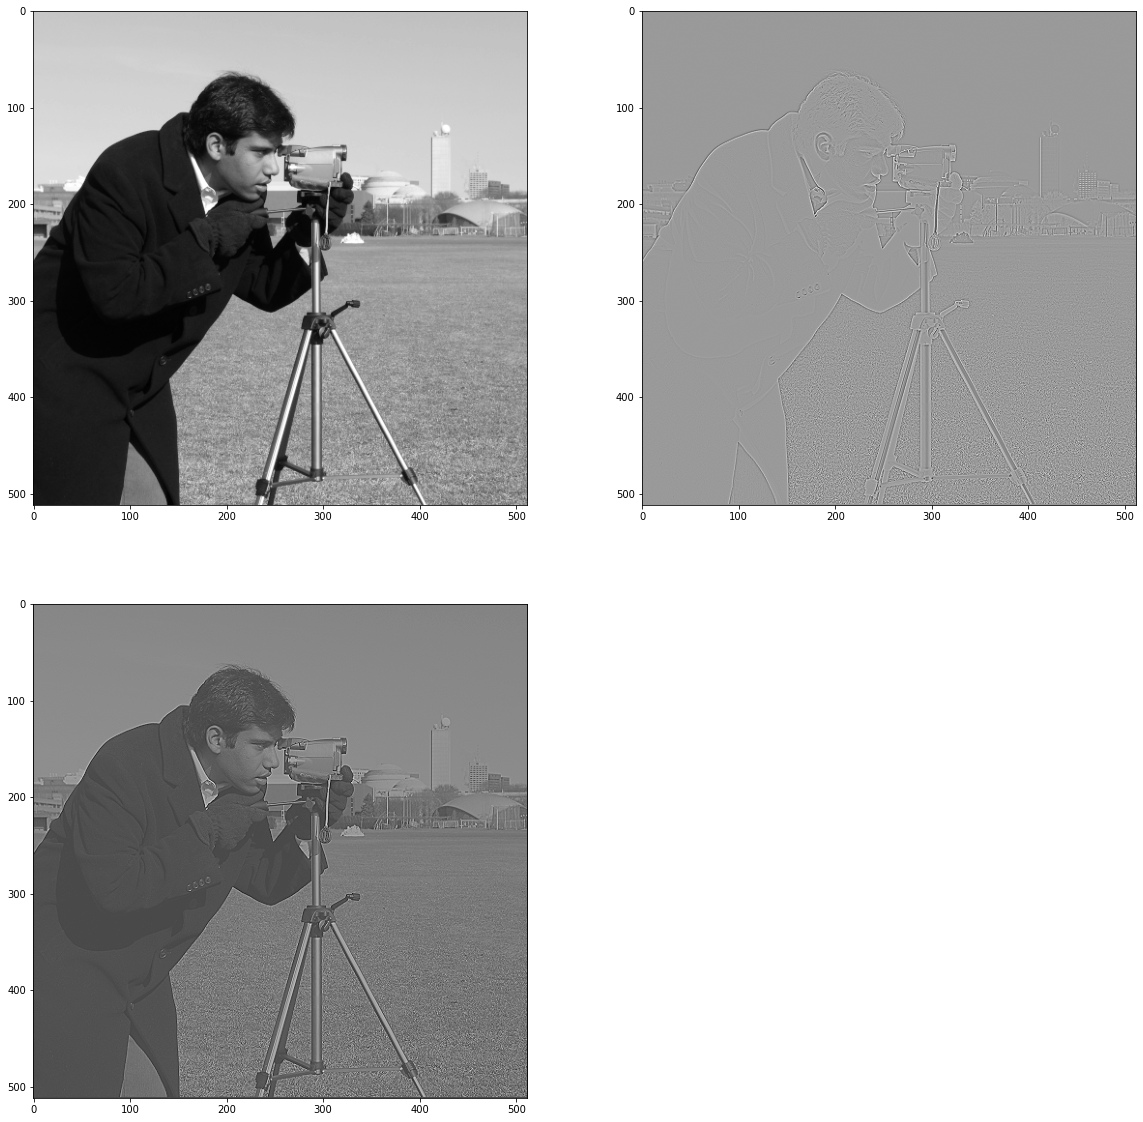

In [38]:
img=data.camera()
img1=laplacian_filter(img) # NOTE: This laplacian filter isn't contributing anything to final image (img2)
img2=enhanced_laplacian_filter(img)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(img, 'gray')
plt.subplot(2,2,2)
plt.imshow(img1, 'gray') # NOTE: Look closer...!
plt.subplot(2,2,3)
plt.imshow(img2, 'gray')

The above (3rd Image) sure looks a bit sharp than original... Meh...!

## Edge-Detection
Well... at least as a by-product, I learned edge detection algorithm...! Just apply Laplacian Filter and black-out (assign 0 to) all positions under a threshold (In my case, it's "10").

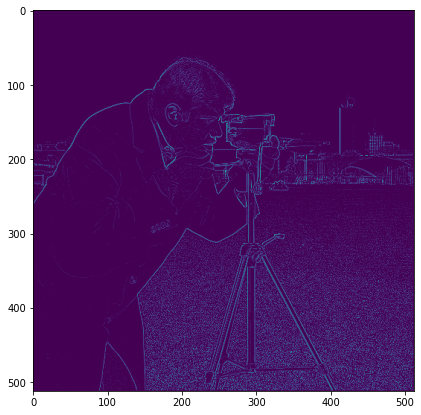

In [39]:
img=laplacian_filter(data.camera())
img_corner=np.zeros((img.shape[0], img.shape[1]))
for i in range(len(img)):
    for j in range(len(img)):
        if img[i][j]>10:
            img_corner[i][j]=img[i][j]
            
plt.figure(figsize=(7,7))
plt.imshow(img_corner)

## 1<sup>st</sup> and 2<sup>nd</sup> Derivative

I seriously don't know where things are heading... I'm just trying to increase sharpness images... without using opencv and by completely understanding the process...

In [40]:
def derivative1(img:np.array):
    shape=img.shape
    img1=np.zeros((shape[0], shape[1]))
    for i in range(shape[0]-1):
        for j in range(shape[1]-1):
            img1[i][j]=img[i][j+1]-img[i][j]+img[i+1][j]-img[i][j]
            if img1[i][j]<0:
                img1[i][j]=0
    return img1
def derivative2(img:np.array):
    shape=img.shape
    img1=np.zeros((shape[0], shape[1]))
    for i in range(shape[0]-1):
        for j in range(shape[1]-1):
            img1[i][j]=img[i][j-1]+img[i][j+1]-2*img[i][j]+img[i-1][j]+img[i+1][j]-2*img[i][j]
            if img1[i][j]<0:
                img1[i][j]=0
    return img1
def final(img:np.array, img1:np.array):
    shape=img.shape
    img2=np.zeros((shape[0], shape[1]))
    for i in range(shape[0]-1):
        for j in range(shape[1]-1):
            img2[i][j]=img[i][j]+img1[i][j]
    return img2

<ipython-input-40-6d87b4a88831>:6: RuntimeWarning: overflow encountered in ubyte_scalars
  img1[i][j]=img[i][j+1]-img[i][j]+img[i+1][j]-img[i][j]
<ipython-input-40-6d87b4a88831>:15: RuntimeWarning: overflow encountered in ubyte_scalars
  img1[i][j]=img[i][j-1]+img[i][j+1]-2*img[i][j]+img[i-1][j]+img[i+1][j]-2*img[i][j]


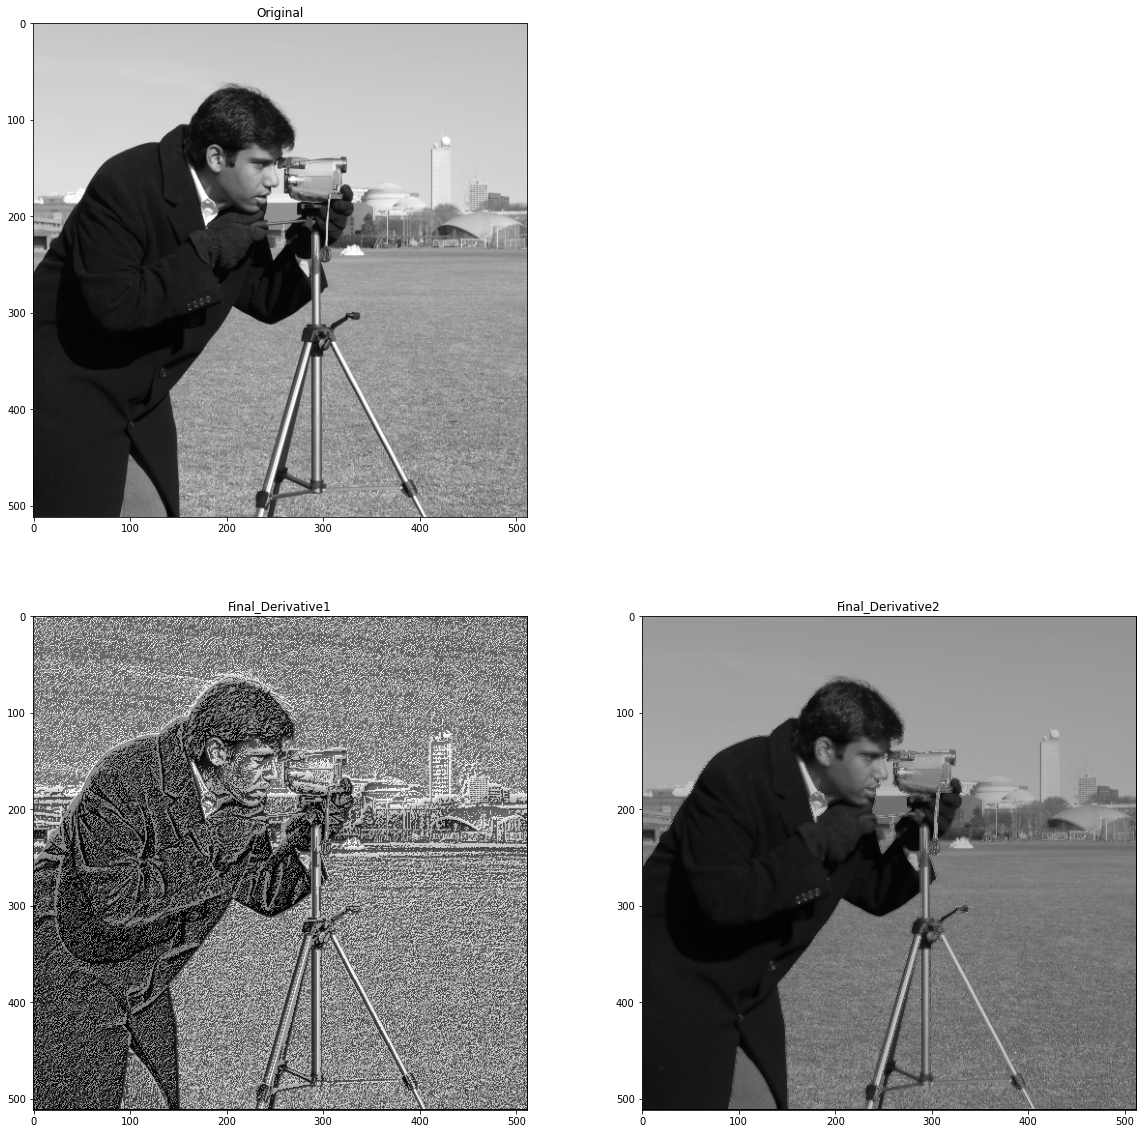

In [41]:
img=data.camera()
img1=derivative1(img)
img2=derivative2(img)
img3=final(img, img1)
img4=final(img, img2)

plt.figure(figsize=(20,20))


plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(img, 'gray')

# plt.title('Original')
# plt.subplot(2,2,2)
# plt.imshow(img2, 'gray')

plt.subplot(2,2,3)
plt.title('Final_Derivative1')
plt.imshow(img3, 'gray')

plt.subplot(2,2,4)
plt.title('Final_Derivative2')
plt.imshow(img4, 'gray')

# Image.fromarray(img).save('derivative_none.jpg')
# Image.fromarray(img1).save('derivative1.jpg')
# Image.fromarray(img2).save('derivative2.jpg')
# img1=laplacian_filter(img)
# img2=enhanced_laplacian_filter(img)